In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os, sys, glob
from PIL import Image
import io
import pickle
from collections import OrderedDict

In [3]:
import model

%load_ext autoreload
%autoreload 2

# Compute features on a list of hdf5s

In [36]:
filenames = glob.glob('*.hdf5')
data = [h5py.File(fname) for fname in filenames]

results = []
for d in data:
    segs = model.get_segment_map(d)
    silhouette = model.get_full_silhouette(d)
    obj_ids = model.get_hashed_segment_map(d)
    masks = model.get_object_masks(d)
    img = model.get_pass_mask(d)
    
    res = {mf.__name__: mf(d) for mf in model.get_model_funcs()}
    results.append(res)

for d in data:
    d.close()

# Example features for a single hdf5

In [37]:
## results
for mname, res in results[0].items():
    print("%s: %s" % (mname, np.round(res, 3)))

silhouette_height: 164.0
silhouette_width: 36.0
silhouette_aspect_ratio: 0.22
silhouette_area: 0.062
silhouette_area_to_bounding_box_area_ratio: 0.69
silhouette_jaggedness: 0.119
color_diversity: 0.179
pisaness: 0.045
num_visible_objects: 8.0


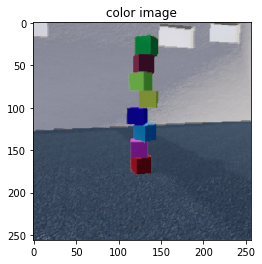

In [14]:
plt.imshow(img)
plt.title('color image')
plt.show()

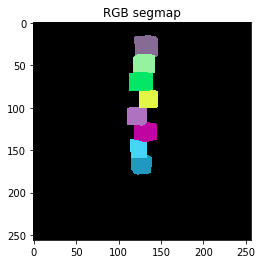

In [15]:
plt.imshow(segs)
plt.title('RGB segmap')
plt.show()

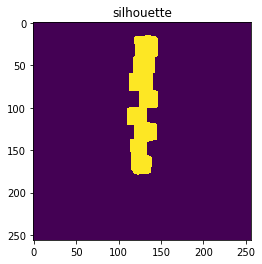

In [16]:
plt.imshow(silhouette)
plt.title('silhouette')
plt.show()

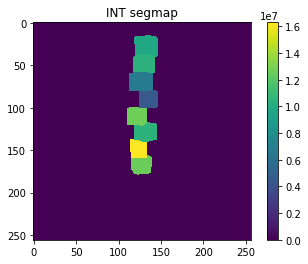

In [17]:
plt.imshow(obj_ids)
plt.title("INT segmap")
plt.colorbar()
plt.show()

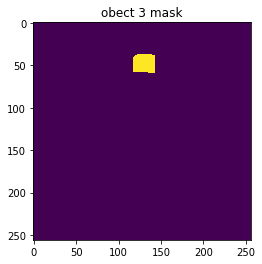

In [18]:
m = 3
plt.imshow(masks[...,m])
plt.title("obect %d mask" % m)
plt.show()

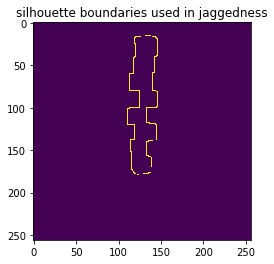

In [20]:
from skimage.segmentation import find_boundaries
plt.imshow(find_boundaries(silhouette, mode='inner', connectivity=2))
plt.title("silhouette boundaries used in jaggedness")
plt.show()


In [21]:
np.linspace(-1.,1.,10)

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

In [24]:
model.silhouette_centroid(silhouette)

array([-0.0160602 ,  0.00064883])